In [86]:
%matplotlib inline

import numpy as np
import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt
from datetime import timedelta

In [87]:
folder = "3.11/"
starttime = 0
dt = 0.012

In [88]:
def read_out_tr(dir, file):
    col = ["events", "time", "from_node", "to_node", "pkt_type", "pkt_size", "flags", "fid", "src_addr", "dst_addr", "seq_num", "pkt_id"]
    df = pd.read_csv(dir+file, sep = ' ', header = None)
    df.columns = col
    return df

In [89]:
def get_receive_packets(df, src_addr):
    df_out = df.loc[df["events"].isin(["r"])]
    df_out = df_out.loc[df_out["pkt_type"].isin(["tcp"])]
    df_out = df_out.loc[df_out["dst_addr"].isin([5.0, 5.1, 5.2, 5.3])]
    df_out = df_out.loc[df_out["src_addr"].isin(src_addr)]
    return df_out

In [90]:
#raw_data = read_out_tr(folder, "HRCC.tr")
#raw_data = read_out_tr(folder, "AFQ10.tr")
#raw_data = read_out_tr(folder, "AFQ100.tr")
#raw_data = read_out_tr(folder, "AFQ1000.tr")
raw_data = read_out_tr(folder, "DropTail.tr")

r_event_in_dst_0 = get_receive_packets(raw_data, [0.0, 0.1, 0.2, 0.3])
r_event_in_dst_1 = get_receive_packets(raw_data, [1.0, 1.1, 1.2, 1.3])
r_event_in_dst_2 = get_receive_packets(raw_data, [2.0, 2.1, 2.2, 2.3])
r_event_in_dst_3 = get_receive_packets(raw_data, [3.0, 3.1, 3.2, 3.3])

In [91]:
r_event_in_dst_1

,events,time,from_node,to_node,pkt_type,pkt_size,flags,fid,src_addr,dst_addr,seq_num,pkt_id
445,r,0.000083,1,4,tcp,40,-------,1,1.0,5.1,0,74
553,r,0.000090,4,5,tcp,40,-------,1,1.0,5.1,0,74
693,r,0.000099,1,4,tcp,1040,-------,1,1.0,5.1,1,116
698,r,0.000099,1,4,tcp,1040,-------,1,1.0,5.1,2,117
817,r,0.000108,4,5,tcp,1040,-------,1,1.0,5.1,1,116
829,r,0.000109,4,5,tcp,1040,-------,1,1.0,5.1,2,117
951,r,0.000117,1,4,tcp,1040,-------,1,1.0,5.1,3,159
956,r,0.000117,1,4,tcp,1040,-------,1,1.0,5.1,4,160
965,r,0.000118,1,4,tcp,1040,-------,1,1.0,5.1,5,162
970,r,0.000118,1,4,tcp,1040,-------,1,1.0,5.1,6,163


In [92]:
r_event_in_dst_0['ts'] = r_event_in_dst_0['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
r_event_in_dst_1['ts'] = r_event_in_dst_1['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
r_event_in_dst_2['ts'] = r_event_in_dst_2['time'].apply(lambda x: pd.Timedelta(x,unit='s'))
r_event_in_dst_3['ts'] = r_event_in_dst_3['time'].apply(lambda x: pd.Timedelta(x,unit='s'))

In [93]:
#pkt_size_series = pd.Series(r_event_in_dst_1['pkt_size'], index=r_event_in_dst['ts'])

In [94]:
# H       hourly frequency
# T, min  minutely frequency
# S       secondly frequency
# L, ms   milliseonds
# U, us   microseconds
# N       nanoseconds
microseconds = 12
shortTh_0 = r_event_in_dst_0[['ts', 'pkt_size']].resample(str(microseconds) + 'U', on='ts').sum()
# GB
shortTh_0['throughtput'] = shortTh_0['pkt_size'] * 8 / (microseconds * 1e-6) / 1000 / 1000 / 1000


shortTh_1 = r_event_in_dst_1[['ts', 'pkt_size']].resample(str(microseconds) + 'U', on='ts').sum()
shortTh_1['throughtput'] = shortTh_1['pkt_size'] * 8 / (microseconds * 1e-6) / 1000 / 1000 / 1000


shortTh_2 = r_event_in_dst_2[['ts', 'pkt_size']].resample(str(microseconds) + 'U', on='ts').sum()
shortTh_2['throughtput'] = shortTh_2['pkt_size'] * 8 / (microseconds * 1e-6) / 1000 / 1000 / 1000


shortTh_3 = r_event_in_dst_3[['ts', 'pkt_size']].resample(str(microseconds) + 'U', on='ts').sum()
shortTh_3['throughtput'] = shortTh_3['pkt_size'] * 8 / (microseconds * 1e-6) / 1000 / 1000 / 1000

shortTh_0.head()

,pkt_size,throughtput
ts,,
00:00:00.000013,80,0.053333
00:00:00.000025,4160,2.773333
00:00:00.000037,8320,5.546667
00:00:00.000049,15600,10.400000
00:00:00.000061,23920,15.946667


In [95]:
shortTh_1.head()

,pkt_size,throughtput
ts,,
00:00:00.000083,80,0.053333
00:00:00.000095,2080,1.386667
00:00:00.000107,6240,4.160000
00:00:00.000119,4160,2.773333
00:00:00.000131,8320,5.546667


In [96]:
res_0 = shortTh_0[['throughtput']].unstack()['throughtput'].T
res_0.index = res_0.index / timedelta(seconds=1)

res_1 = shortTh_1[['throughtput']].unstack()['throughtput'].T
res_1.index = res_1.index / timedelta(seconds=1)

res_2 = shortTh_2[['throughtput']].unstack()['throughtput'].T
res_2.index = res_2.index / timedelta(seconds=1)

res_3 = shortTh_3[['throughtput']].unstack()['throughtput'].T
res_3.index = res_3.index / timedelta(seconds=1)



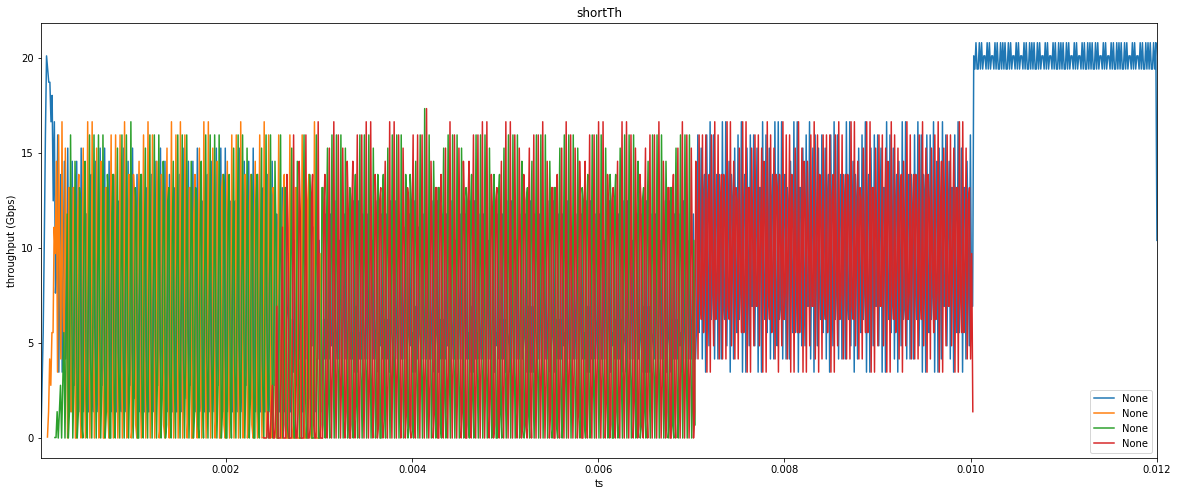

In [97]:
plt.xlabel('time')
plt.ylabel('throughput (Gbps)')
plt.title("ShortTh in real time")

res_0.plot(kind='line', legend=True, title='shortTh', figsize=(20,8))
res_1.plot(kind='line', legend=True, title='shortTh', figsize=(20,8))
res_2.plot(kind='line', legend=True, title='shortTh', figsize=(20,8))
res_3.plot(kind='line', legend=True, title='shortTh', figsize=(20,8))

#line0 = plt.plot(res0[ts], res0[throughput], color='red', label=label0)
#line1 = plt.plot(res1[ts], res1[throughput], color='blue', label=label1)
#line2 = plt.plot(res2[ts], res2[throughput], color='green', label=label2)
#line3 = plt.plot(res3[ts], res3[throughput], color='yellow', label=label3)




plt.show()